In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Simulation:
    def __init__(self, l: int, T: int):
        self.lattice = np.full((l, l), fill_value=1, dtype=int)
        self.bound = l
        self.temp = T

    def trial(self, idr, idc):
        energy_diff = sum([self.lattice[idr-1][idc], self.lattice[(idr+1) % self.bound][idc],
                           self.lattice[idr][idc-1], self.lattice[idr][(idc+1) % self.bound]])  \
                      * 2 * self.lattice[idr, idc]
        if np.exp(-energy_diff/self.temp) > np.random.rand():
            return True
        else:
            return False

    def mcs(self):
        for idr, row in enumerate(self.lattice):
            for idc, field in enumerate(row):
                if self.trial(idr, idc):
                    self.lattice[idr, idc] *= -1

In [3]:
Tc = 2.26918531421

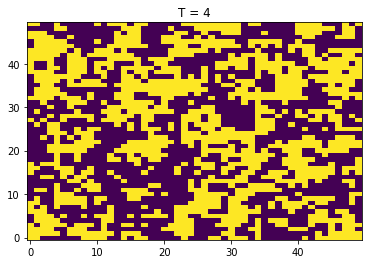

In [5]:
#########  1
T = [1.5, Tc, 4]
L = [50]
for t in T:
    for l in L:
        sym = Simulation(l, t)
        for _ in range(500): sym.mcs()
    plt.imshow(sym.lattice, aspect='auto', interpolation='none', origin='lower')
    plt.title(f'T = {t}')         
    plt.savefig(f'{l}-{t}.png')


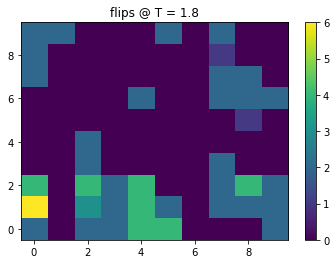

In [37]:
#########  2
sym = Simulation(10, 1.8)
for _ in range(500): sym.mcs()
tmp = np.array(sym.lattice)
sym.mcs()
flip = np.absolute((sym.lattice-tmp)/2)
plt.imshow(flip, aspect='auto', interpolation='none', origin='lower')
plt.title(f'flip @ T = 1.8')         
plt.savefig(f'flip.png')
for _ in range(20):
    tmp = np.array(sym.lattice)
    sym.mcs()
    flip += np.absolute((sym.lattice - tmp)/2)
plt.imshow(flip, aspect='auto', interpolation='none', origin='lower')
plt.colorbar()
plt.title(f'flips @ T = 1.8')         
plt.savefig(f'flips.png')

In [ ]:
#########  3
T = [t*Tc for t in np.arange(.4, 5, .2)]
L = [10, 50, 100]
def mean_energy(lat, bound):
    tmp = 0
    for idr, row in enumerate(lat):
            for idc, field in enumerate(row):
                tmp += field * sum([lat[idr-1][idc], lat[(idr+1) % bound][idc], lat[idr][idc-1], lat[idr][(idc+1) % bound]])  
    return tmp/2

def mean_energy2(lat, bound):
    tmp = 0
    for idr, row in enumerate(lat):
            for idc, field in enumerate(row):
                tmp += (field * sum([lat[idr-1][idc], lat[(idr+1) % bound][idc], lat[idr][idc-1], lat[idr][(idc+1) % bound]]))**2  
    return tmp/2

for l in L:
    values = []
    for t in T:
        sym = Simulation(l, t)
        for _ in range(1000): sym.mcs()
        avg_mag = np.mean(sym.lattice)
        avg_energy = mean_energy(sym.lattice, l)/l**2
        susceptibility = l**2/t*(np.mean(np.square(sym.lattice)) - avg_mag**2)
        heat = 1/(l**2*t**2) * (mean_energy2(sym.lattice, l) - mean_energy(sym.lattice, l)**2)
        values.append([t, avg_mag, avg_energy, susceptibility, heat])
    values = np.array(values)
    labels = ['magnetization', 'energy', 'susceptibility', 'heat capacity']
    for i in range(4):
        plt.scatter(values[:,0], values[:,i], label=labels[i])
    plt.legend()
    plt.savefig(f'3-{l}.png')